In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


# University of Strathclyde -  MSc Artificial Intelligence and Applications
# CS982 - Big Data Technologies
# Assignment 1 - Exploring Data

 File Created first created 10th October 2019 by Barry Smart.

## Stage 5 - Address Gaps In The Data
 The purpose of this notebook is to address some of the gaps in the data.

### Design Decisions
 - Linear extrapolation was used to


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy


### Stage 5.1 - Read The File
 Read in the file that was generated from the previous script.

In [2]:
# Read the raw World Bank data from the CSV file
data_path = str(os.getcwd()) + "\\assignment1\\"
pivoted_worldbank_data = pd.read_pickle(data_path + "pivoted_worldbank_data.pkl")


In [3]:
pivoted_worldbank_data.shape


(12726, 20)

In [4]:
pivoted_worldbank_data.reset_index()["Country"].value_counts()


Netherlands                  59
Moldova                      59
Austria                      59
India                        59
Mali                         59
                             ..
Turks and Caicos Islands     59
Tuvalu                       59
West Bank and Gaza           44
Serbia                       35
Sint Maarten (Dutch part)    21
Name: Country, Length: 217, dtype: int64

### Stage 5.2 - Fill In The Missing Data
 Fill in the blanks *only forwards* using linear interpolation.
 For each country in the Year dimension.
 The following documentation was used:
 (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html)[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html]

 Approach from stack overflow also useful:
 (https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group)[https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group]

 Generic form:
 df['value'] = df.groupby(['category', 'name'])['value'].transform(lambda x: x.fillna(x.mean()))

In [5]:
interpolated_data_set = pivoted_worldbank_data.groupby(level="Country").apply(lambda group: group.interpolate(method='linear', limit_direction='forward', limit=60))


In [6]:
# The following dataframe captures how many null values have been filled in using this interpolation technique
interpolation_results = pd.DataFrame()
interpolation_results["Data Points in Original Data"] = pivoted_worldbank_data.count(axis = 0)
interpolation_results["NaNs in Original Data"] = pivoted_worldbank_data.isnull().sum(axis = 0)
interpolation_results["Data Points in Interpolated Data"] = interpolated_data_set.count(axis = 0)
interpolation_results["NaNs in Interpolated Data"] = interpolated_data_set.isnull().sum(axis = 0)
interpolation_results["Number of NaNs Interpolated"] = interpolation_results["NaNs in Original Data"] - interpolation_results["NaNs in Interpolated Data"]
interpolation_results


,Data Points in Original Data,NaNs in Original Data,Data Points in Interpolated Data,NaNs in Interpolated Data,Number of NaNs Interpolated
Series Name,,,,,
Account at financial institution (% of population ages 15-24),427,12299,1207,11519,780
Electric power consumption (kWh per capita),5907,6819,6477,6249,570
Energy use (kg of oil equivalent per capita),6082,6644,7320,5406,1238
Fossil fuel energy consumption (% of total),5860,6866,7274,5452,1414
GDP per capita (current US$),9675,3051,9879,2847,204
"Immunization, DPT (% of children ages 12-23 months)",6871,5855,6871,5855,0
"Inflation, consumer prices (annual %)",7671,5055,7842,4884,171
"Life expectancy at birth, total (years)",11329,1397,11747,979,418
Market capitalization of listed domestic companies (current US$),2199,10527,2623,10103,424


In [7]:
# Save data frame to CSV so that it can be imported into document.
interpolation_results.to_csv("./assignment1/interpolation_results.csv")


In [8]:
summary = interpolation_results.sum(axis=0)
summary


Data Points in Original Data        146445
NaNs in Original Data               108075
Data Points in Interpolated Data    159504
NaNs in Interpolated Data            95016
Number of NaNs Interpolated          13059
dtype: int64

In [9]:
# Percentage of 


### Stage 5.3 - Visualise The Results Of Filling In Missing Data
 Generate some visualisations to show how the interpolation has worked.

In [10]:
# This funtion places each sub plot onto the frame
def create_sub_plot(figure, axes, x_position, y_position, data_series, x_column, y_column, title):
    #sns.lineplot(x="Year", y=y_column, data=data_series, ax=axes[x_position,y_position])
    axes[x_position,y_position].plot(data_series[y_column], color="black")
    axes[x_position,y_position].set_title(title)

# This function configures the frame and then iterates through the results to create slices of the data that can be plotted
def plot_interpolation_results(list_of_dataframes, list_of_countries, column_to_plot, share_x=True):
    country_dimension = len(list_of_countries)
    dataframe_dimension = len(list_of_dataframes)
    # Set up the number of sub plots based on the dimensions of experiments and points
    figure_size_unit = 8 # This governs the size of each subplot on the figure 
    sns.set_style("ticks", {'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': '-'})
    plt.rcParams.update({'axes.titlesize' : 18, 'lines.linewidth' : 3,\
         'axes.labelsize' : 16, 'xtick.labelsize' : 16, 'ytick.labelsize' : 16})
    figure, axes = plt.subplots(country_dimension, 2, sharex=share_x, figsize=(figure_size_unit * dataframe_dimension, figure_size_unit * country_dimension))
    for country_index, country in enumerate(list_of_countries):
        for dataframe_index, dataframe in enumerate(list_of_dataframes):
            # Use the "cross section" method to grab the results for a specific experiment and points configuration
            dataframe_to_plot = dataframe.loc[pd.IndexSlice[:,:,[country]], :].loc[:, [column_to_plot]].\
                reset_index(level=["Region", "Income Group", "Country", "Decade"])
            # Set up the title for the plot
            if dataframe_index == 0:
                title = column_to_plot + "\nBEFORE Interpolation For " + country
            else:
                title = column_to_plot + "\nAFTER Interpolation For " + country
            # Send the data off to get plotted
            create_sub_plot(figure, axes, country_index, dataframe_index , dataframe_to_plot, "Year", column_to_plot, title)
    plt.subplots_adjust(hspace=.4)


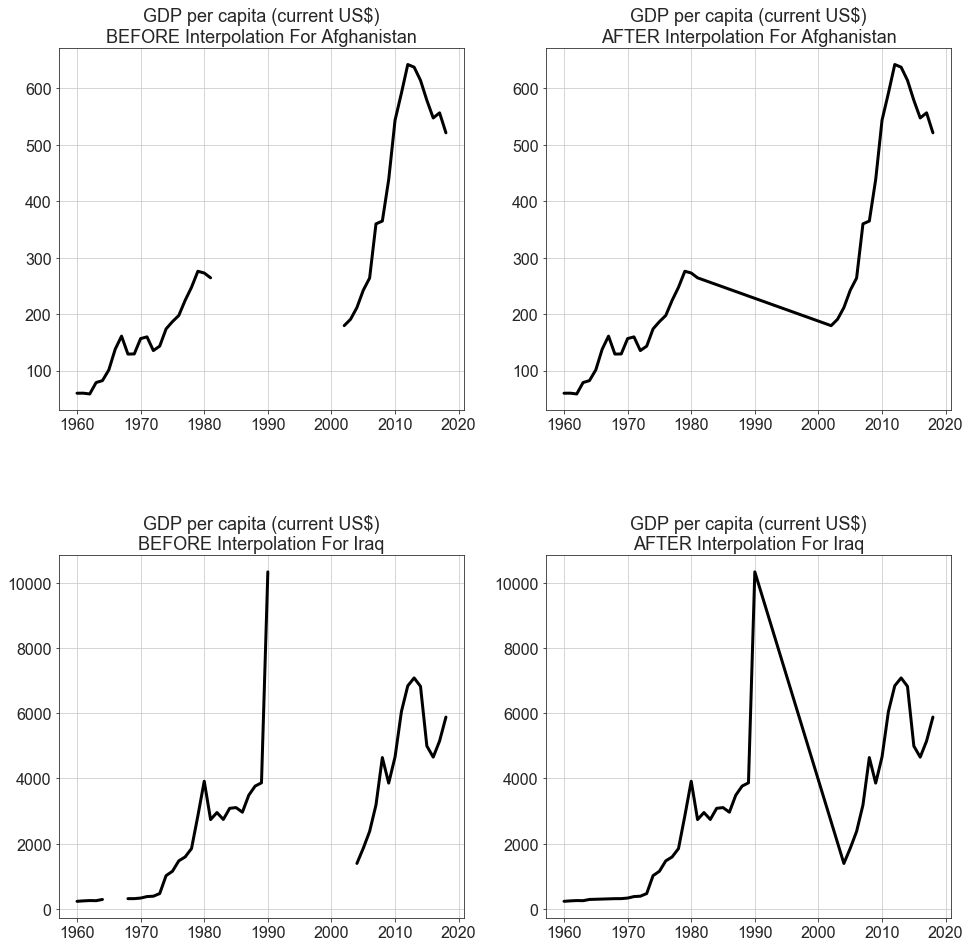

In [11]:
plot_interpolation_results([pivoted_worldbank_data, interpolated_data_set], ['Afghanistan', 'Iraq'], "GDP per capita (current US$)", share_x=False)


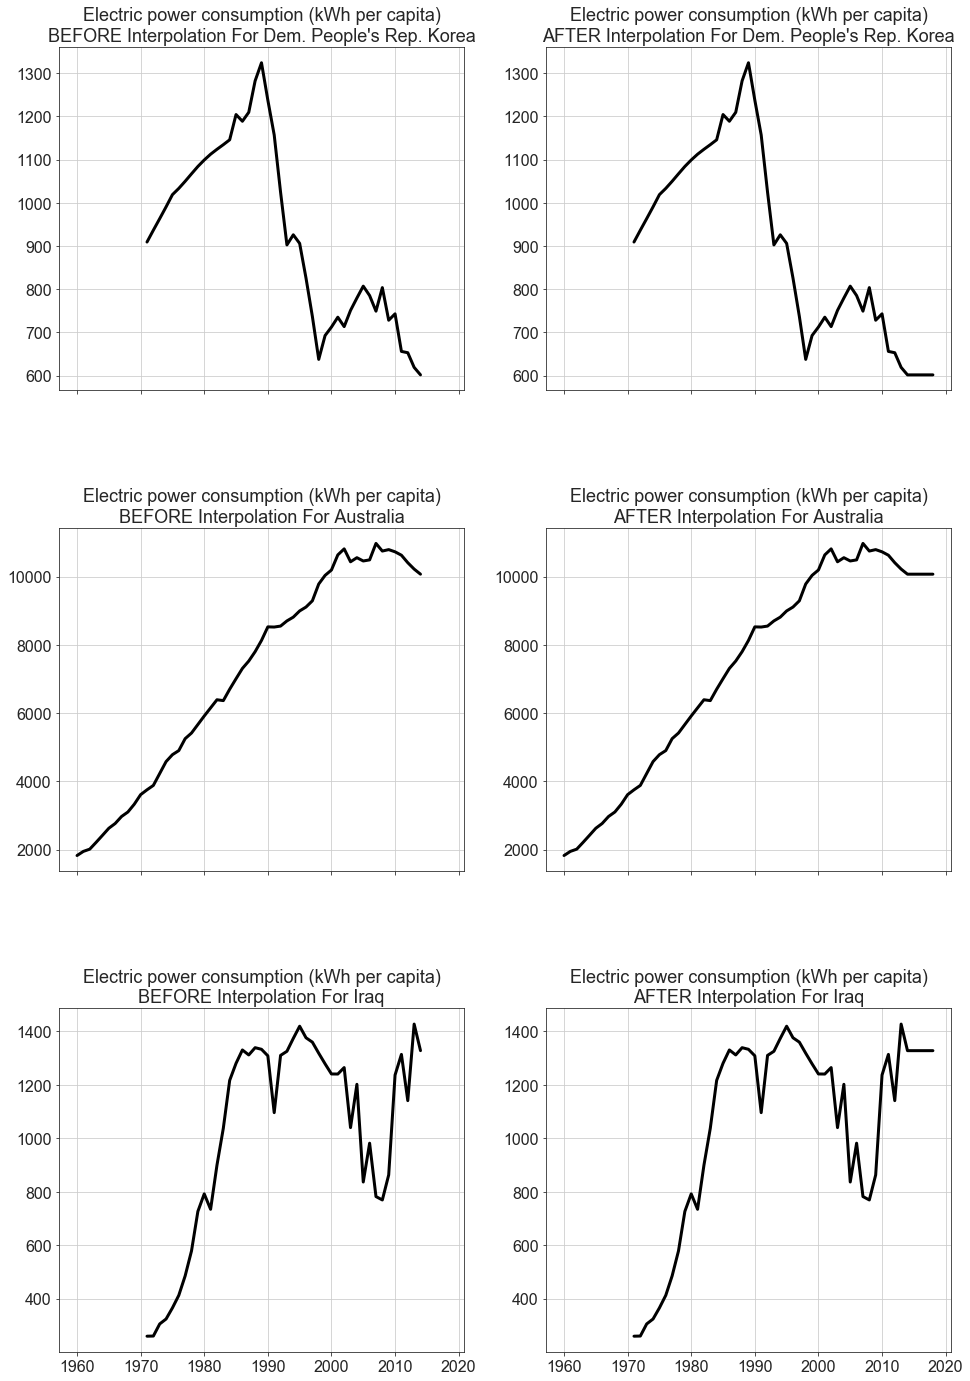

In [12]:
plot_interpolation_results([pivoted_worldbank_data, interpolated_data_set], ['Dem. People\'s Rep. Korea', 'Australia', 'Iraq'], "Electric power consumption (kWh per capita)", share_x=True)


### Stage 6.4 - Fill In Other Dimension Based On Mean?
 Potential to fill in further gaps using Regional averages by Year?
 This could be used to get even further coverage in data points.  But risk also that too much interpolation starts to skew the analysis, so decided to leave this out for now.

### Stage 6.5 - Write To File
 Now we write the resulting data frame to the Pickle file format to preserve all meta data.

In [13]:
interpolated_data_set.to_pickle(data_path + "interpolated_data_set.pkl")
